# Supermarket Sales Analysis 

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## Exploring Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [120]:
pd.DataFrame(df.describe(exclude='object')).T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


## Checking null values

In [125]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

## Converting column Date to Datetime

In [132]:
df['Date'] = pd.to_datetime(df['Date'],)

In [137]:
df['Day'] = (df['Date']).dt.day
df['Month'] = (df['Date']).dt.month
df['Year'] = (df['Date']).dt.year

In [139]:
df['Time'] = pd.to_datetime(df['Time'])

In [141]:
df['Hour'] = (df['Time']).dt.hour

## Checking Unique Value in Hour Column

In [151]:
df.Hour.unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int32)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

### Descriptive Statistic

In [262]:
pd.DataFrame(df.describe(exclude=['object', 'datetime64[ns]'])).T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000
Day,1000.0,15.256000,8.693563e+00,1.000000,8.000000,15.000000,23.000000,31.000000
Month,1000.0,1.993000,8.352536e-01,1.000000,1.000000,2.000000,3.000000,3.000000


In [264]:
# descriptive statistics categorical numbers
pd.DataFrame(df.describe(include='object')).T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Payment,1000,3,Ewallet,345


In [266]:
# descriptive statistics datetime
pd.DataFrame(df.describe(include='datetime64[ns]')).T

,count,mean,min,25%,50%,75%,max
Date,1000,2019-02-14 00:05:45.600000,2019-01-01 00:00:00,2019-01-24 00:00:00,2019-02-13 00:00:00,2019-03-08 00:00:00,2019-03-30 00:00:00
Time,1000,2025-01-03 15:24:41.880000,2025-01-03 10:00:00,2025-01-03 12:43:00,2025-01-03 15:19:00,2025-01-03 18:15:00,2025-01-03 20:59:00


In [268]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day                        0
Month                      0
Year                       0
Hour                       0
dtype: int64

### Drop Unimportant Features

In [270]:
df.drop('Invoice ID',axis=1,inplace=True)

In [272]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2025-01-03 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2025-01-03 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2025-01-03 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2025-01-03 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2025-01-03 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2025-01-03 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,29,1,2019,13
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2025-01-03 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,2,3,2019,17
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2025-01-03 13:22:00,Cash,31.84,4.761905,1.5920,7.7,9,2,2019,13
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2025-01-03 15:33:00,Cash,65.82,4.761905,3.2910,4.1,22,2,2019,15


### Categorical Columns

In [274]:
col_categorical = [col for col in df.columns if df[col].dtype == 'object']
col_categorical

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [276]:
for value in col_categorical:
    print(f'num of unique in {value} :',df[value].nunique() )

num of unique in Branch : 3
num of unique in City : 3
num of unique in Customer type : 2
num of unique in Gender : 2
num of unique in Product line : 6
num of unique in Payment : 3


In [278]:
df.shape

(1000, 20)

### Visualization Categorical Columns

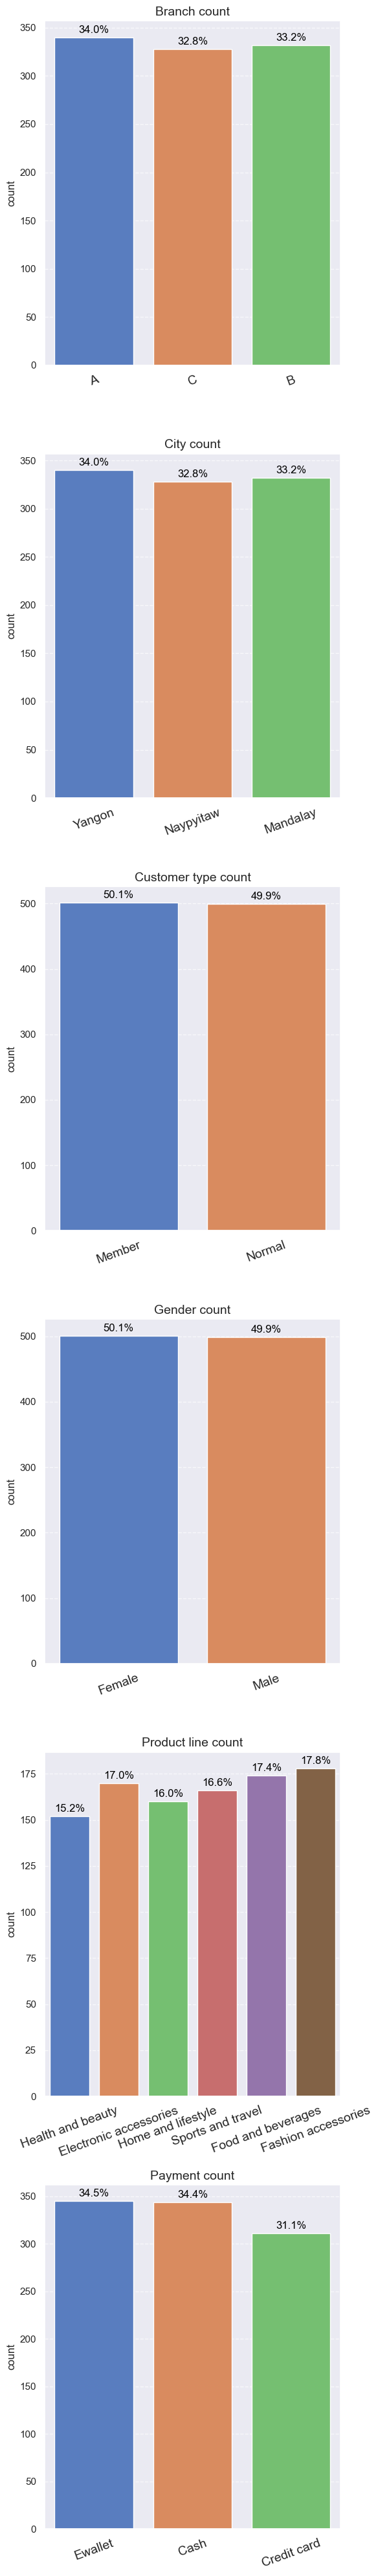

In [296]:
sns.set(style="darkgrid")
plt.figure(figsize=(6, 40), dpi=100)

for ax, col in enumerate(col_categorical):
    plt.subplot(6, 1, ax + 1)
    ax = sns.countplot(x=col, data=df, palette="muted")
    plt.title(f'{col} count', fontsize=14)
    plt.xticks(ha='center', rotation=20, fontsize=14)
    ax.set_xlabel('')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
     # Annotate bars with percentages
    total = float(len(df))
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Adjust layout for tight fit
    plt.tight_layout()

plt.show()

### Categorical Columns by Branch

In [302]:
col_categorical

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

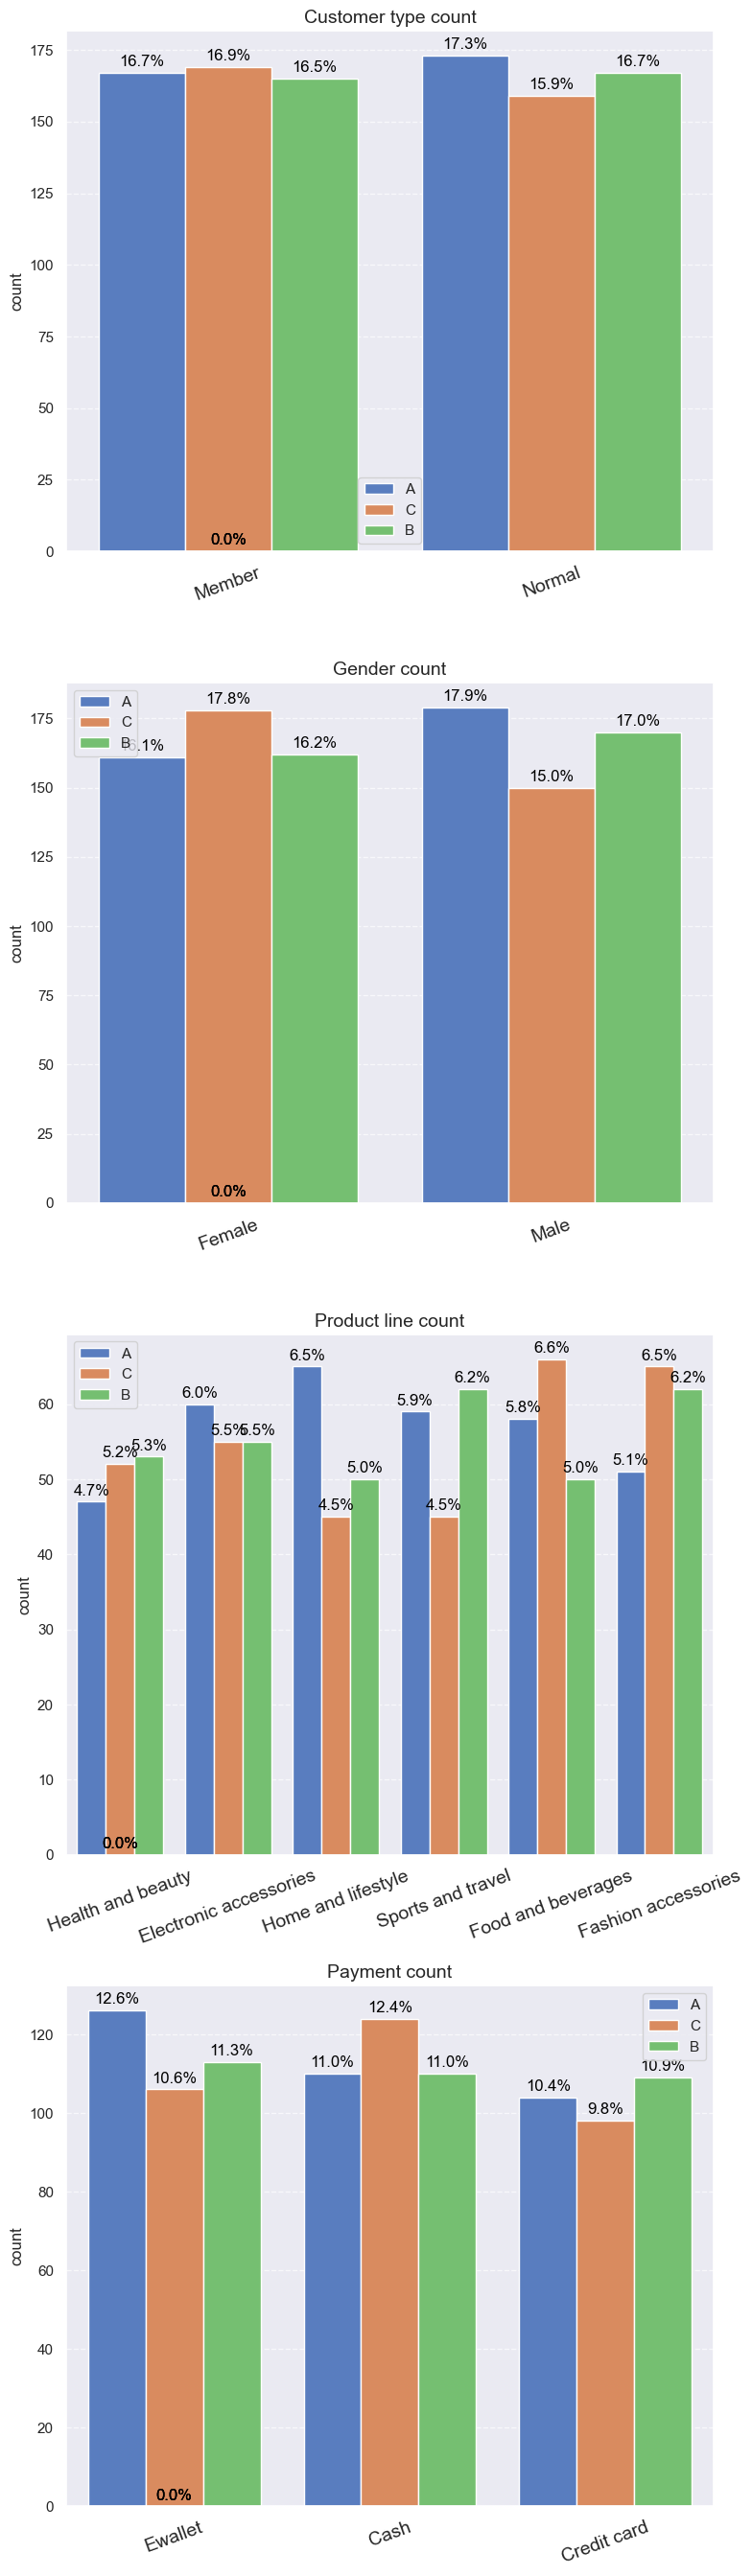

In [300]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,40),dpi=100)
for ax,col in enumerate(col_categorical[2:]):
    plt.subplot(6,1,ax+1)
    ax = sns.countplot(x=col, data= df,hue='Branch', palette="muted")
    plt.title(f'{col} count',fontsize=14)
    plt.xticks(ha='center',rotation=20,fontsize=14)
    ax.set_xlabel('')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Annotate bars with percentages
    total = float(len(df))
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Adjust layout for tight fit
    plt.tight_layout()   
    plt.legend()
plt.show()     

### Categorical Columns without gender

In [304]:
col_categorical_without_gender = col_categorical.copy()

In [306]:
col_categorical_without_gender.remove('Gender')

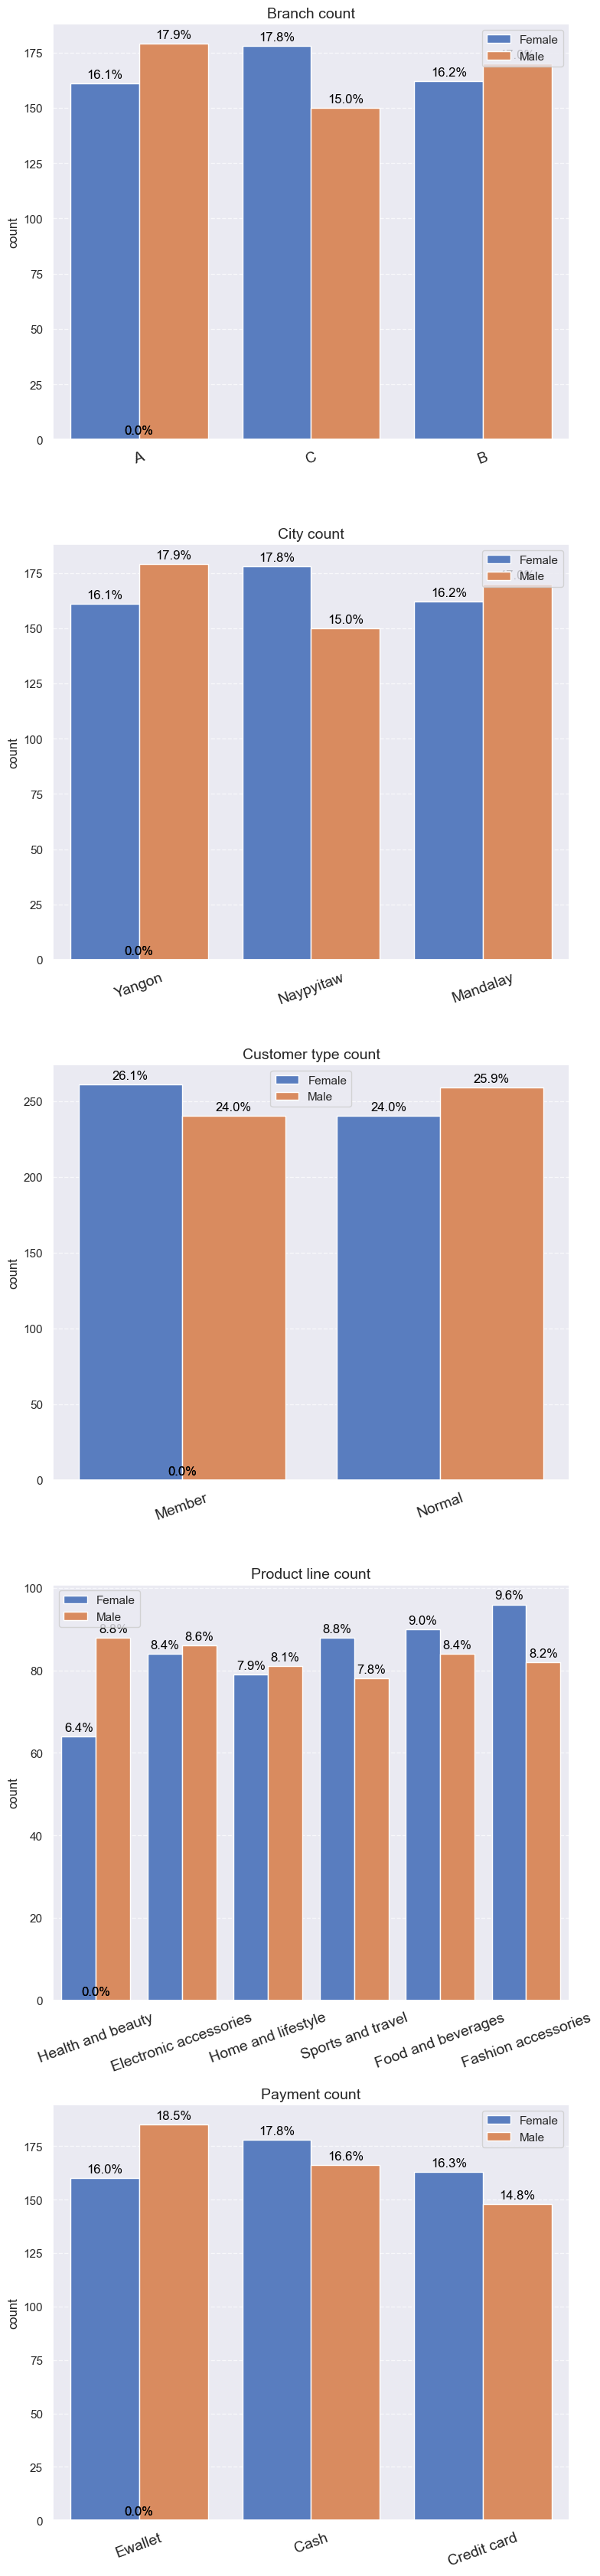

In [310]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,40),dpi=100)
for ax,col in enumerate(col_categorical_without_gender):
    plt.subplot(6,1,ax+1)
    ax = sns.countplot(x=col, data= df,hue='Gender', palette="muted")
    plt.title(f'{col} count',fontsize=14)
    plt.xticks(ha='center',rotation=20,fontsize=14)
    ax.set_xlabel('')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    # Annotate bars with percentages
    total = float(len(df))
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Adjust layout for tight fit
    plt.tight_layout()   
    plt.legend()
plt.show()     

### Categorical Columns by Rating

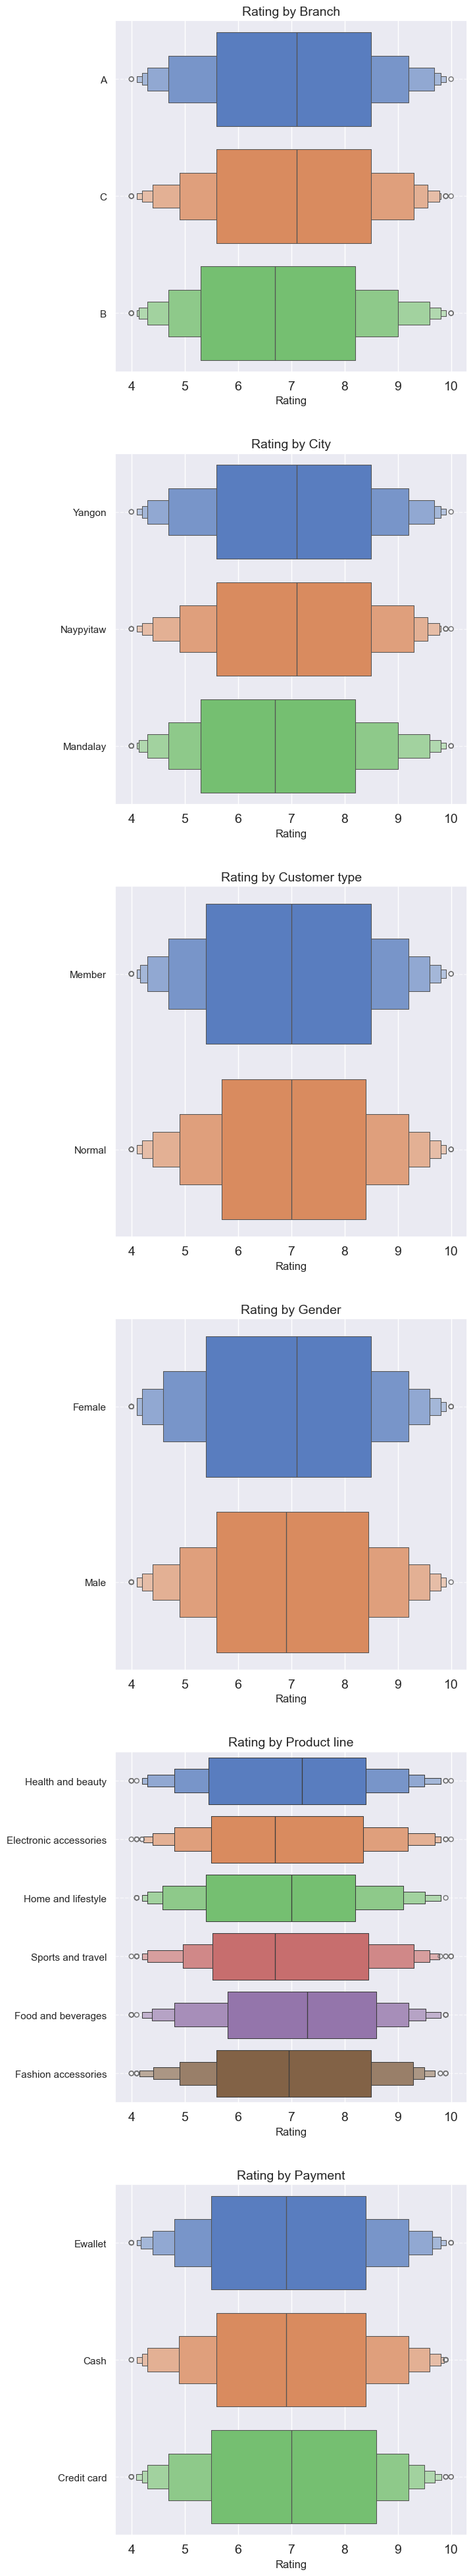

In [316]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,40),dpi=100)
for ax,col in enumerate(col_categorical):
    plt.subplot(6,1,ax+1)
    ax = sns.boxenplot(y=col,x='Rating', data= df, palette="muted")
    plt.title(f'Rating by {col}',fontsize=14)
    plt.xticks(ha='center',fontsize=14)
    ax.set_ylabel('')
    ax.set_xlabel('Rating')
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)
    
plt.tight_layout(pad=3.0)
plt.show()     

### Product Sales Distribuition by Datetime

In [320]:
Day_month_hour = df.iloc[:,16:21]
Day_month_hour.drop('Year',axis=1,inplace=True)

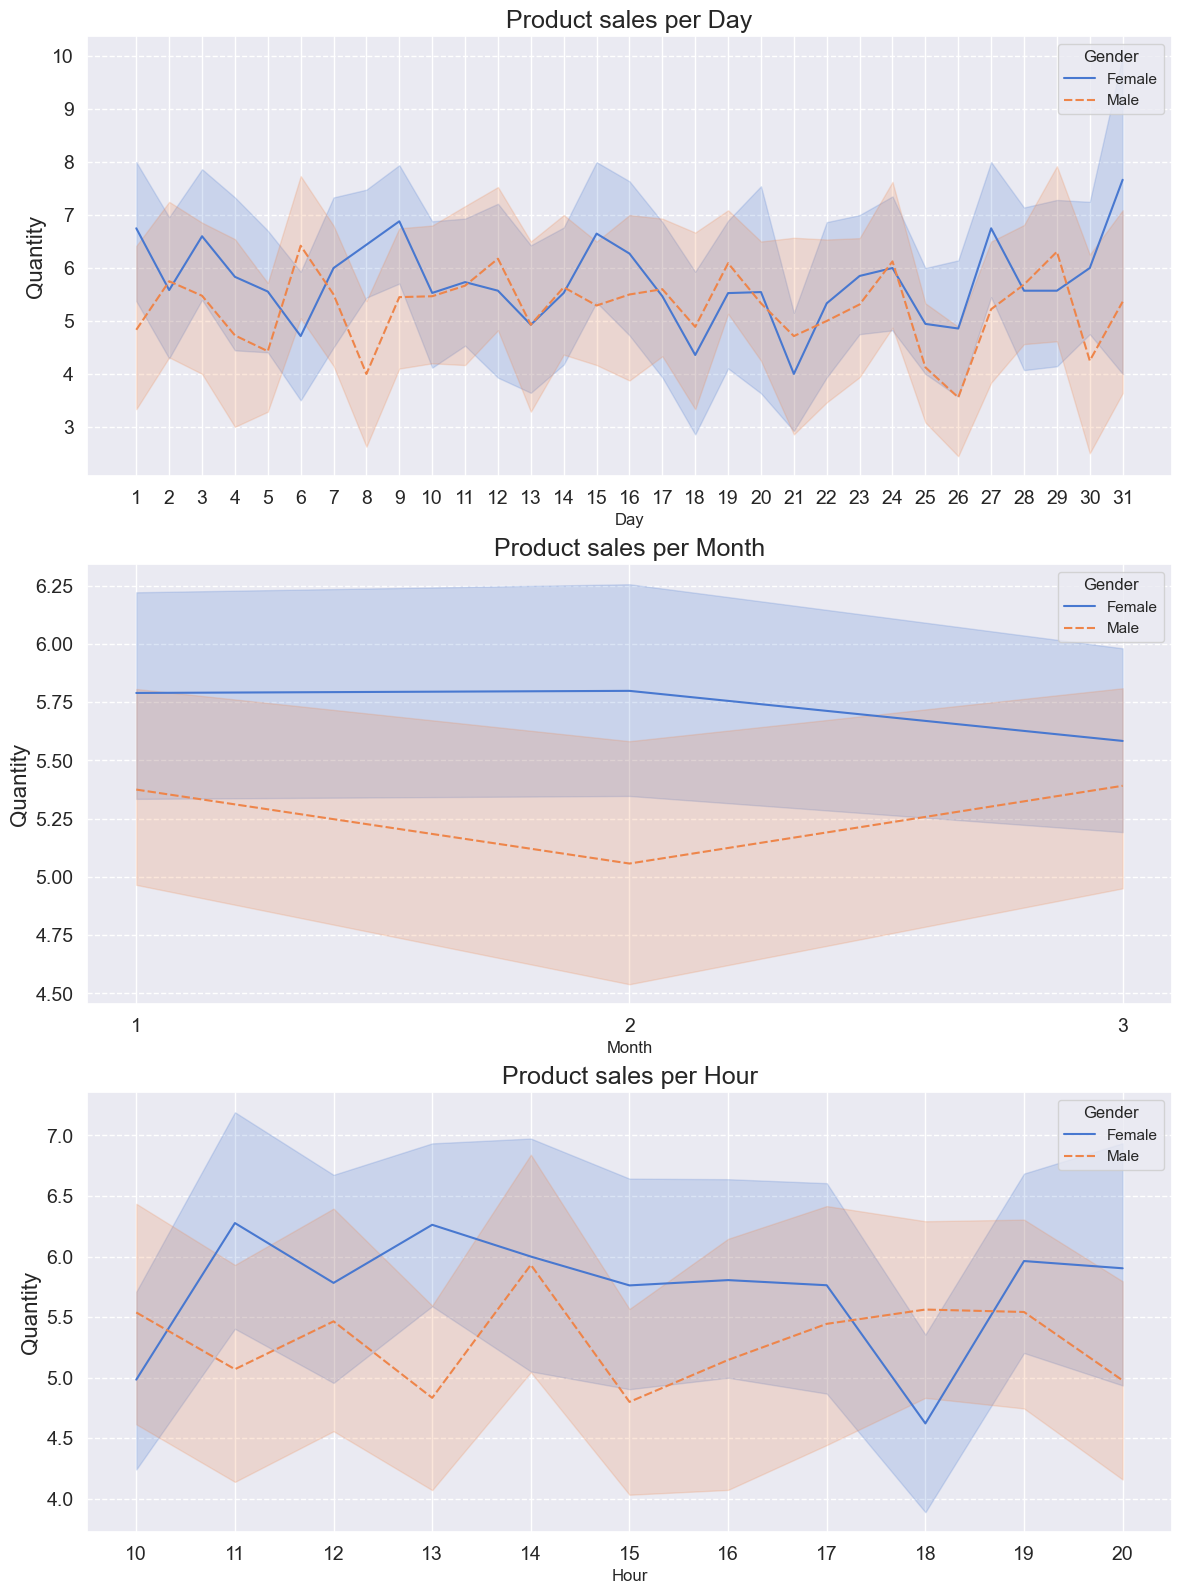

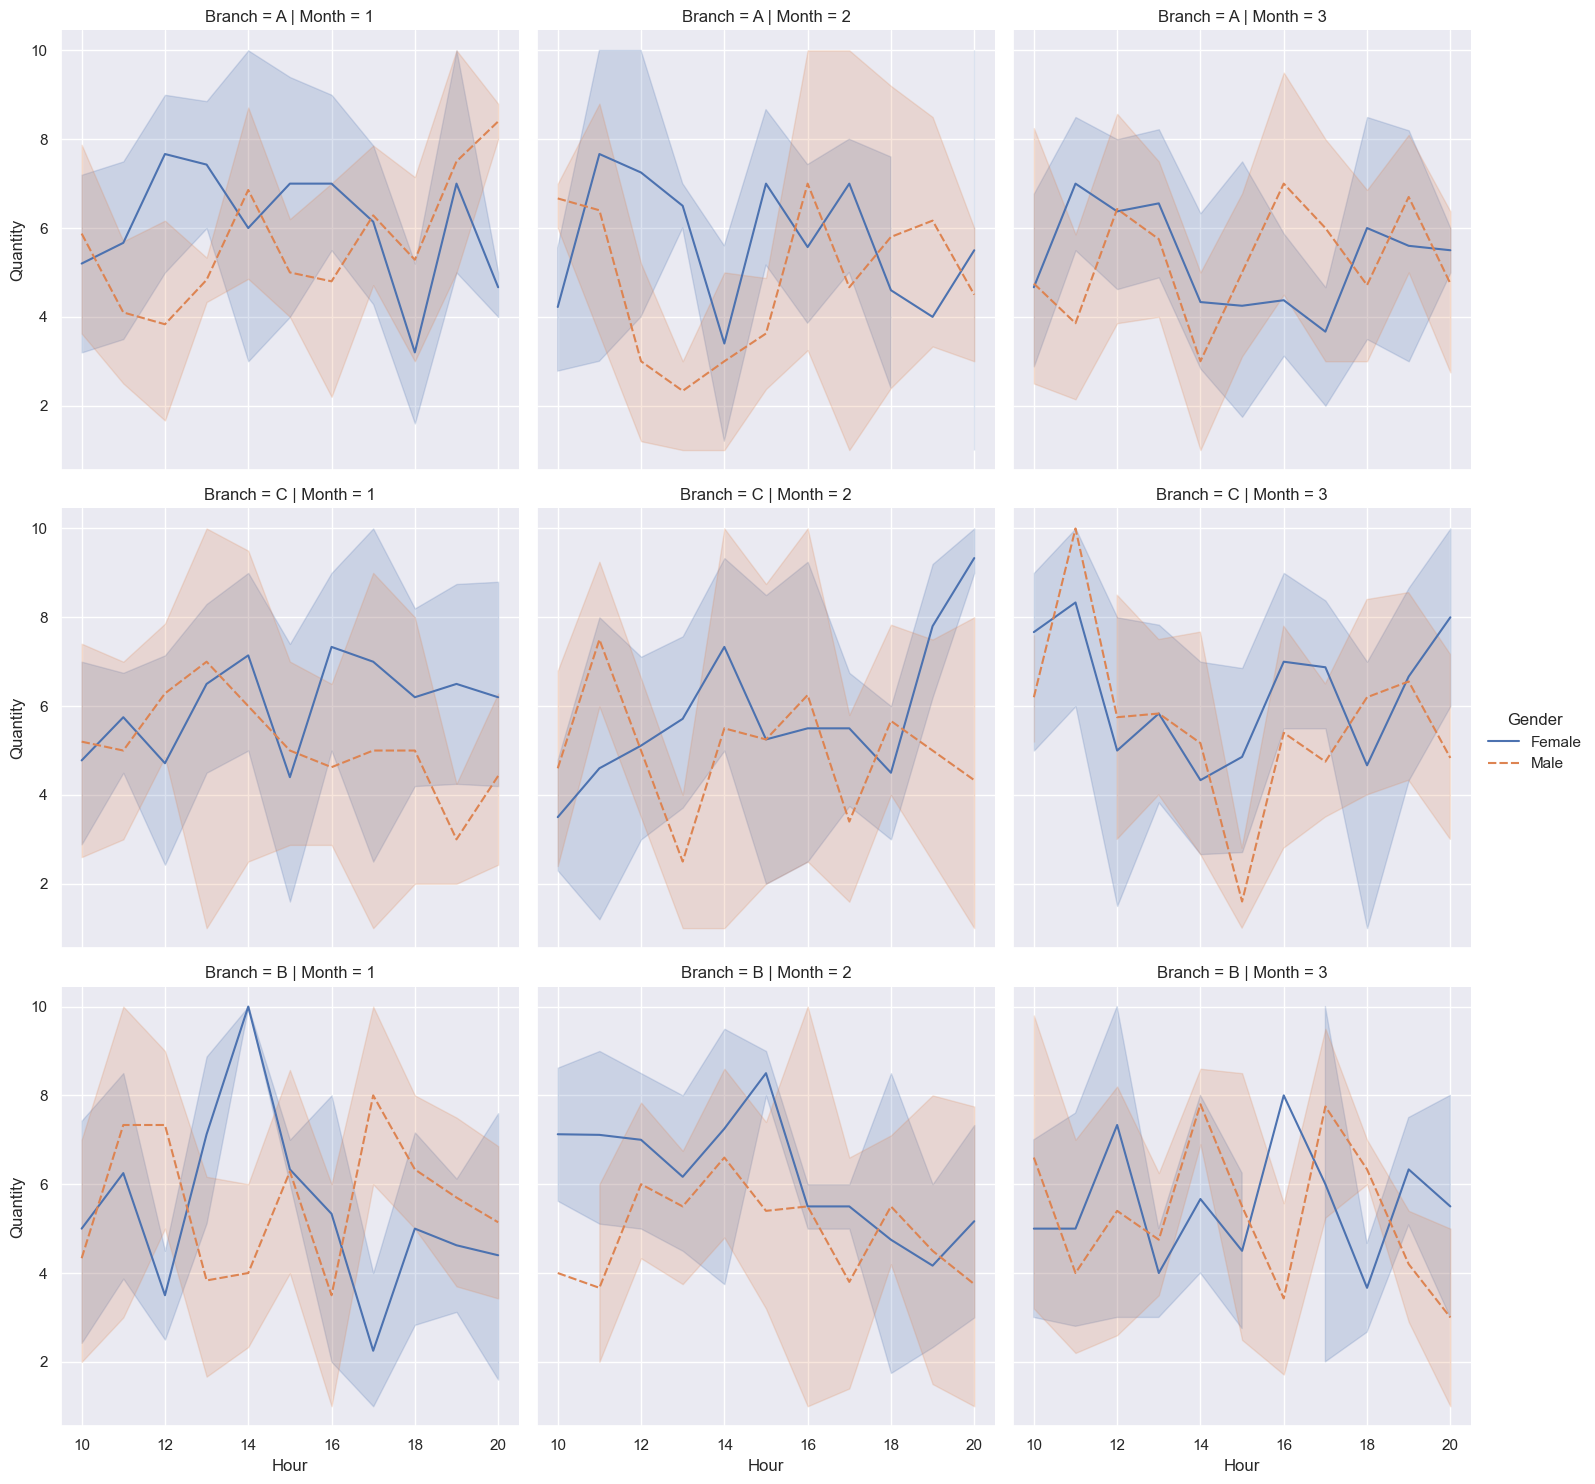

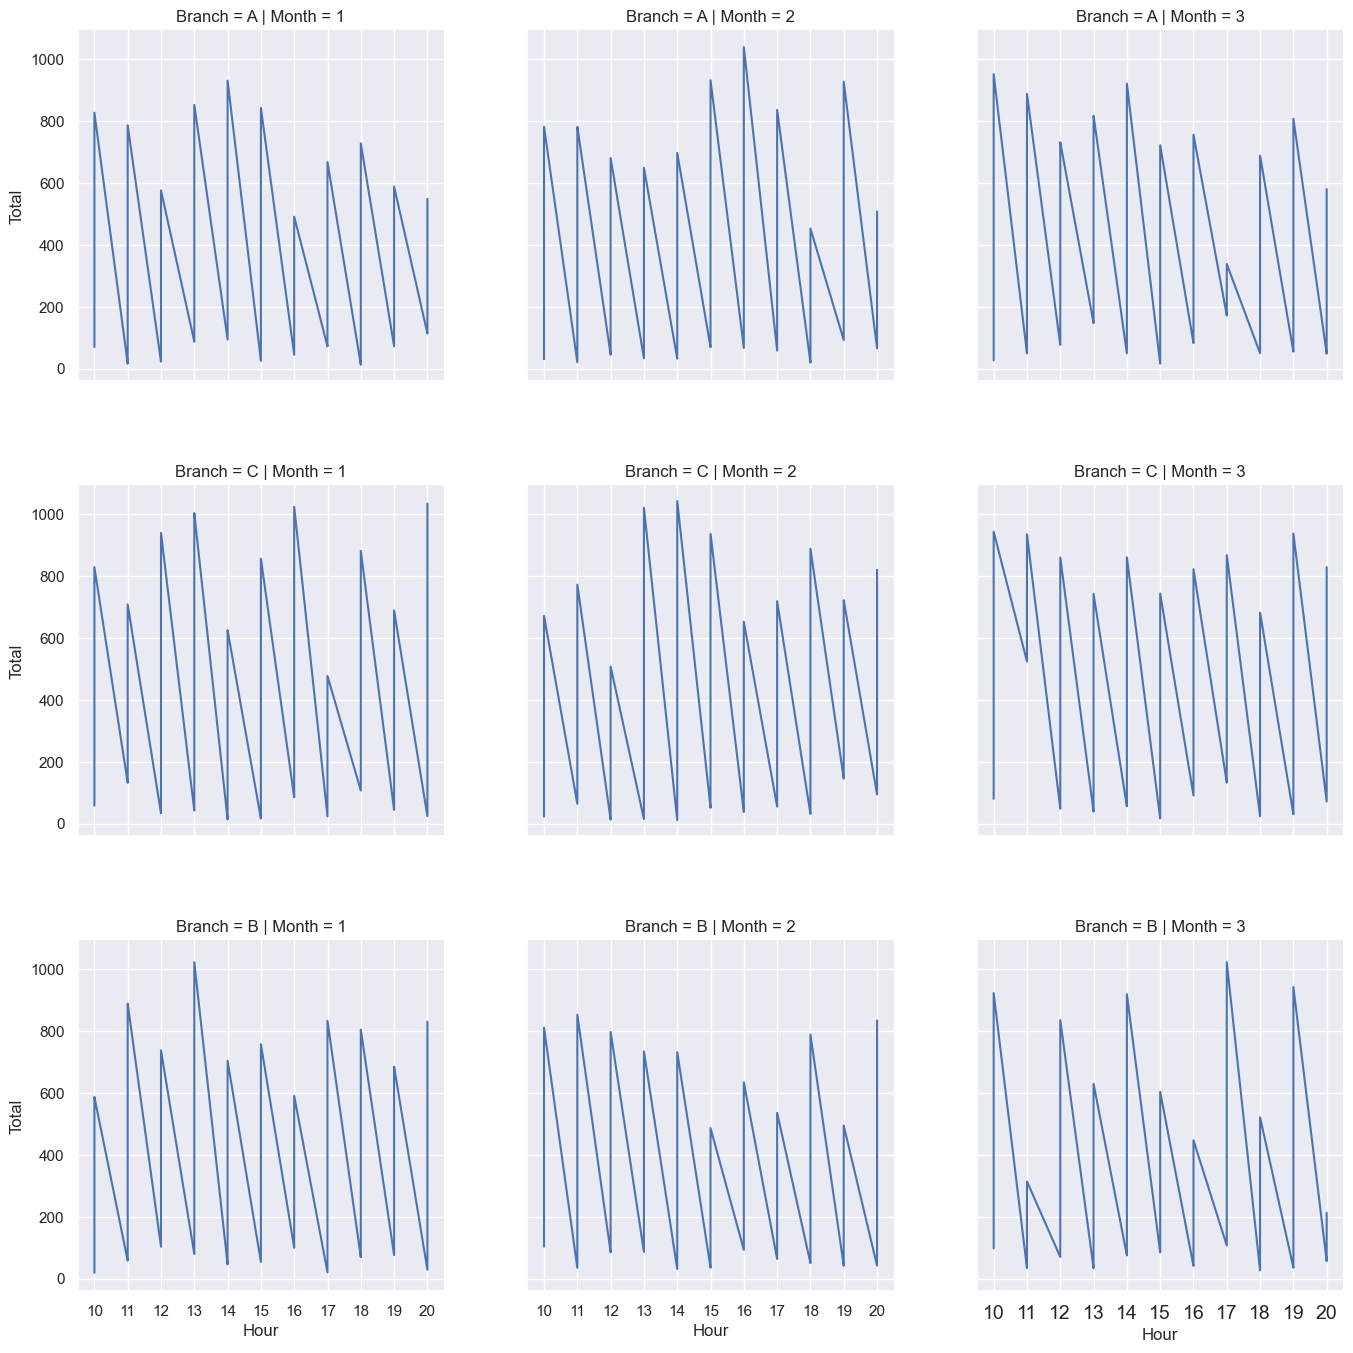

In [326]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,40),dpi=100)
for ax,col in enumerate(Day_month_hour):
    plt.subplot(6,1,ax+1)
    ax = sns.lineplot(x=col,y='Quantity',hue="Gender", style="Gender", data= df, palette="muted")
    plt.title(f'Product sales per {col}',fontsize=18)
    plt.xticks(np.arange(df[col].min(), df[col].max()+1, step=1),fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_xlabel(col)
    ax.set_ylabel('Quantity',fontsize=16)
    ax.grid(True, axis='y', linestyle='--')
    #plt.xlim(Data[col].min(),Data[col].max())

genderCount  = sns.relplot(x="Hour",  y = 'Quantity', col= 'Month' , row= 'Branch', kind="line", hue="Gender", style="Gender", data =df)
genderCount  = sns.relplot(x="Hour",  y = 'Total', col= 'Month' , row= 'Branch', estimator = None, kind="line", data =df)

plt.xticks(np.arange(df['Hour'].min(), df['Hour'].max()+1, step=1),fontsize=14)
plt.tight_layout(pad=5.0)


plt.show()    

### Rating by Total

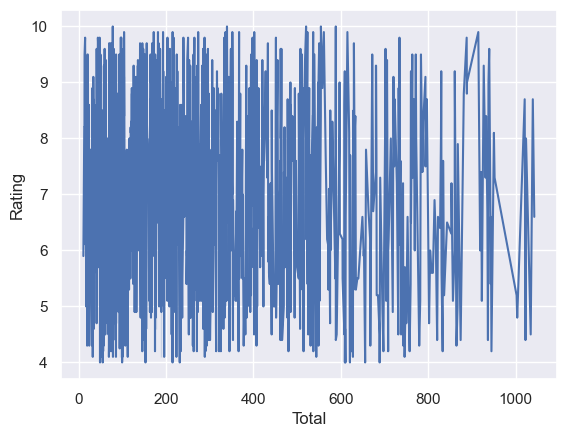

In [334]:
ageDisSpend = sns.lineplot(x="Total", y = "Rating", data =df)


### Product Line Distribution 

<Axes: xlabel='count', ylabel='Product line'>

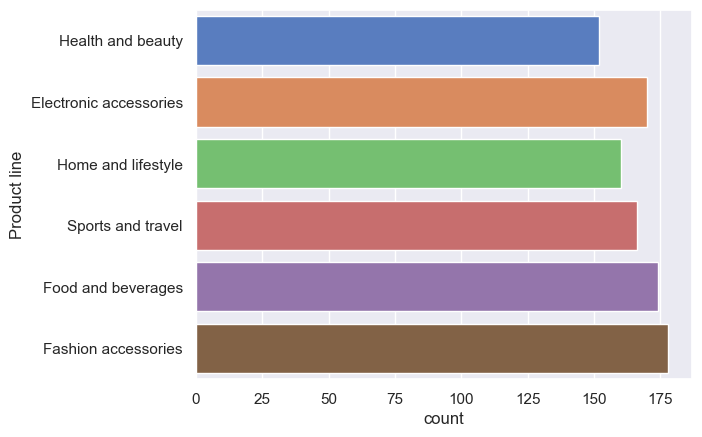

In [336]:
sns.countplot(y = 'Product line', data=df, palette="muted")

<Axes: xlabel='Quantity', ylabel='Product line'>

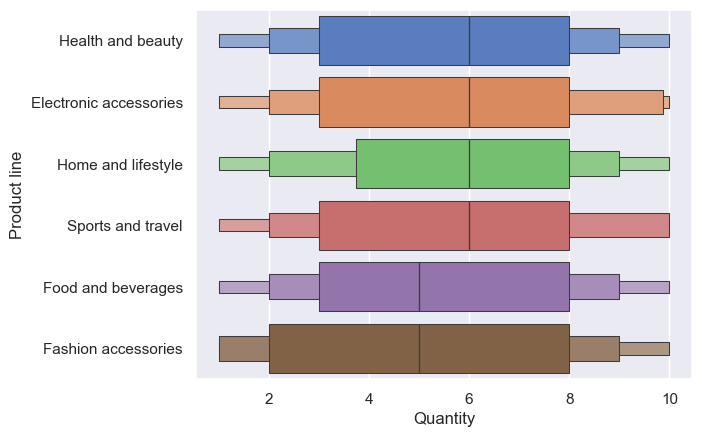

In [338]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df, palette="muted")

<Axes: xlabel='Total', ylabel='Product line'>

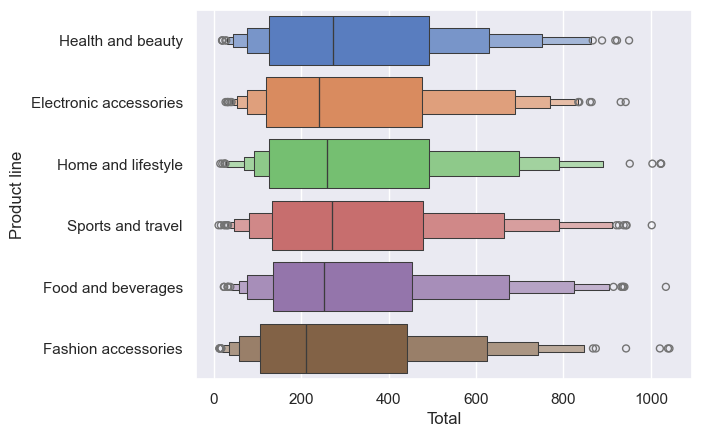

In [340]:
sns.boxenplot(y = 'Product line', x = 'Total', data=df, palette="muted")

<Axes: xlabel='Total', ylabel='Product line'>

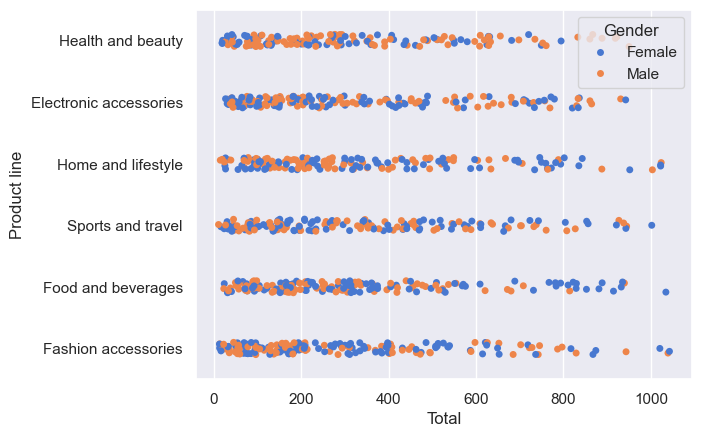

In [342]:
sns.stripplot(y = 'Product line', x = 'Total',hue='Gender', data=df, palette="muted")

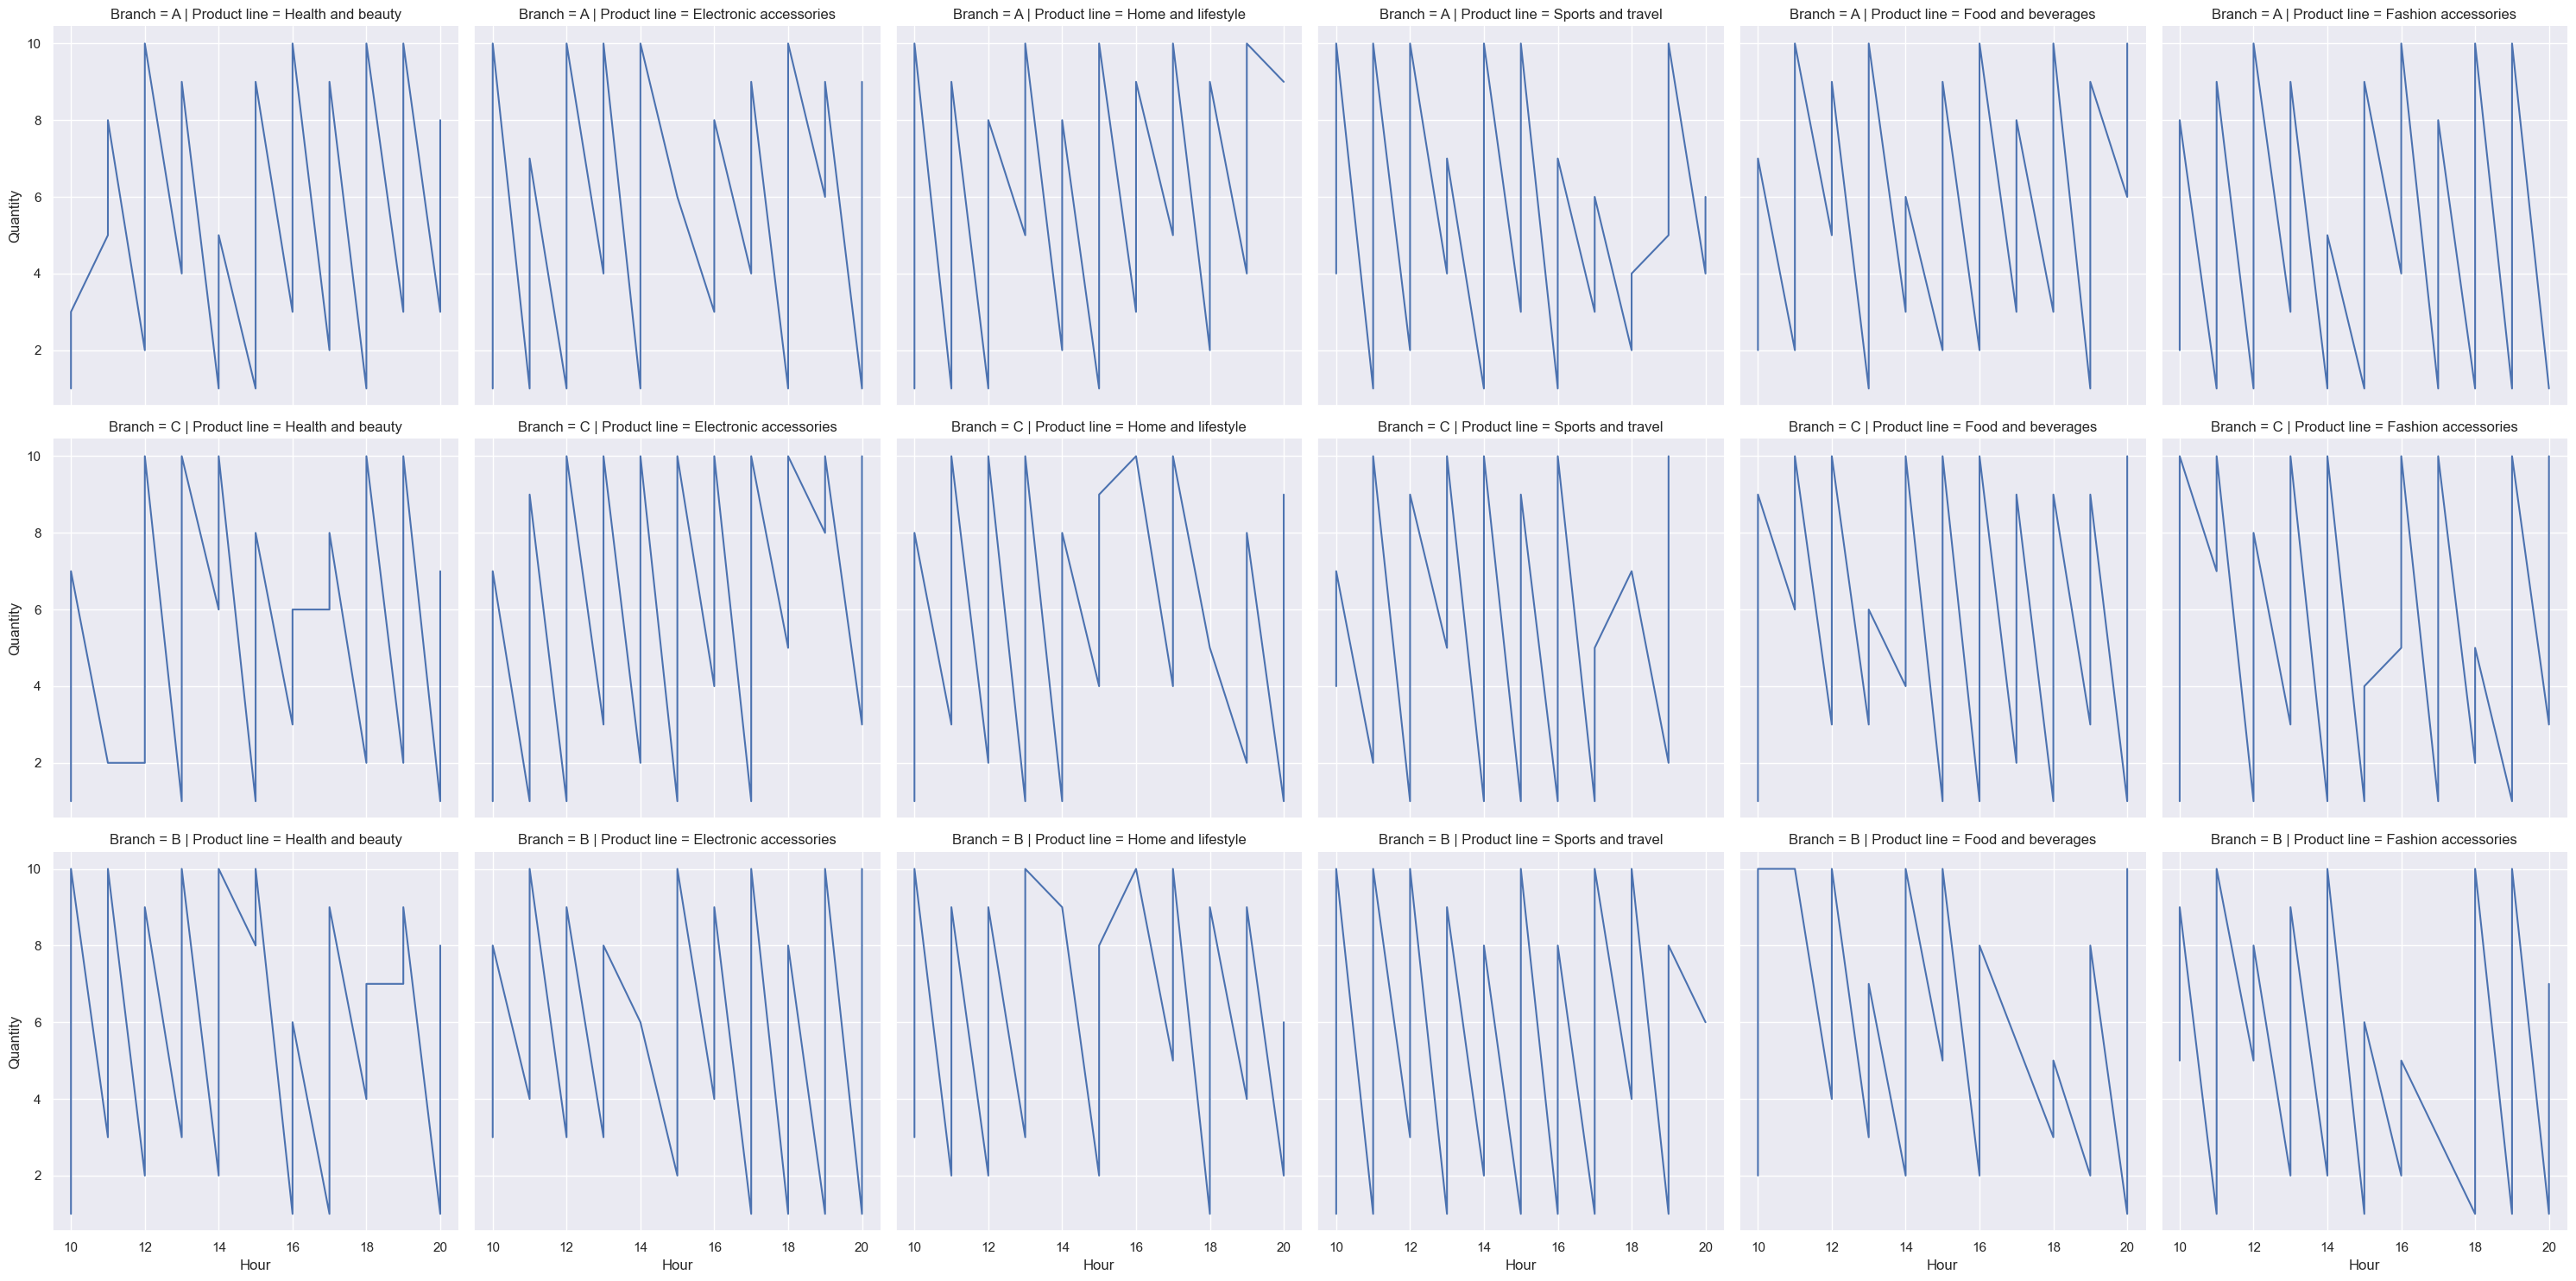

In [344]:
sns.relplot(x="Hour",  y = 'Quantity', col= 'Product line' , row= 'Branch', estimator = None, kind="line", data =df, palette="muted")
plt.show()

### Customer Type Distribution 

In [346]:
df.groupby(['Customer type']).agg({'Total':'sum'})

,Total
Customer type,
Member,164223.444
Normal,158743.305


<Axes: xlabel='Customer type', ylabel='Total'>

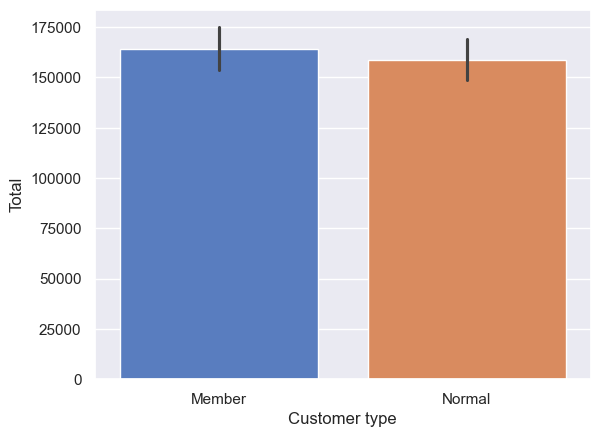

In [350]:
sns.barplot(x='Customer type', y ='Total',data=df,estimator='sum', palette="muted")

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   object        
 1   City                     1000 non-null   object        
 2   Customer type            1000 non-null   object        
 3   Gender                   1000 non-null   object        
 4   Product line             1000 non-null   object        
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   object        
 12  cogs                     1000 non-n

In [354]:
df.drop(['gross margin percentage'],axis = 1,inplace = True)

## Correlation Between Feature

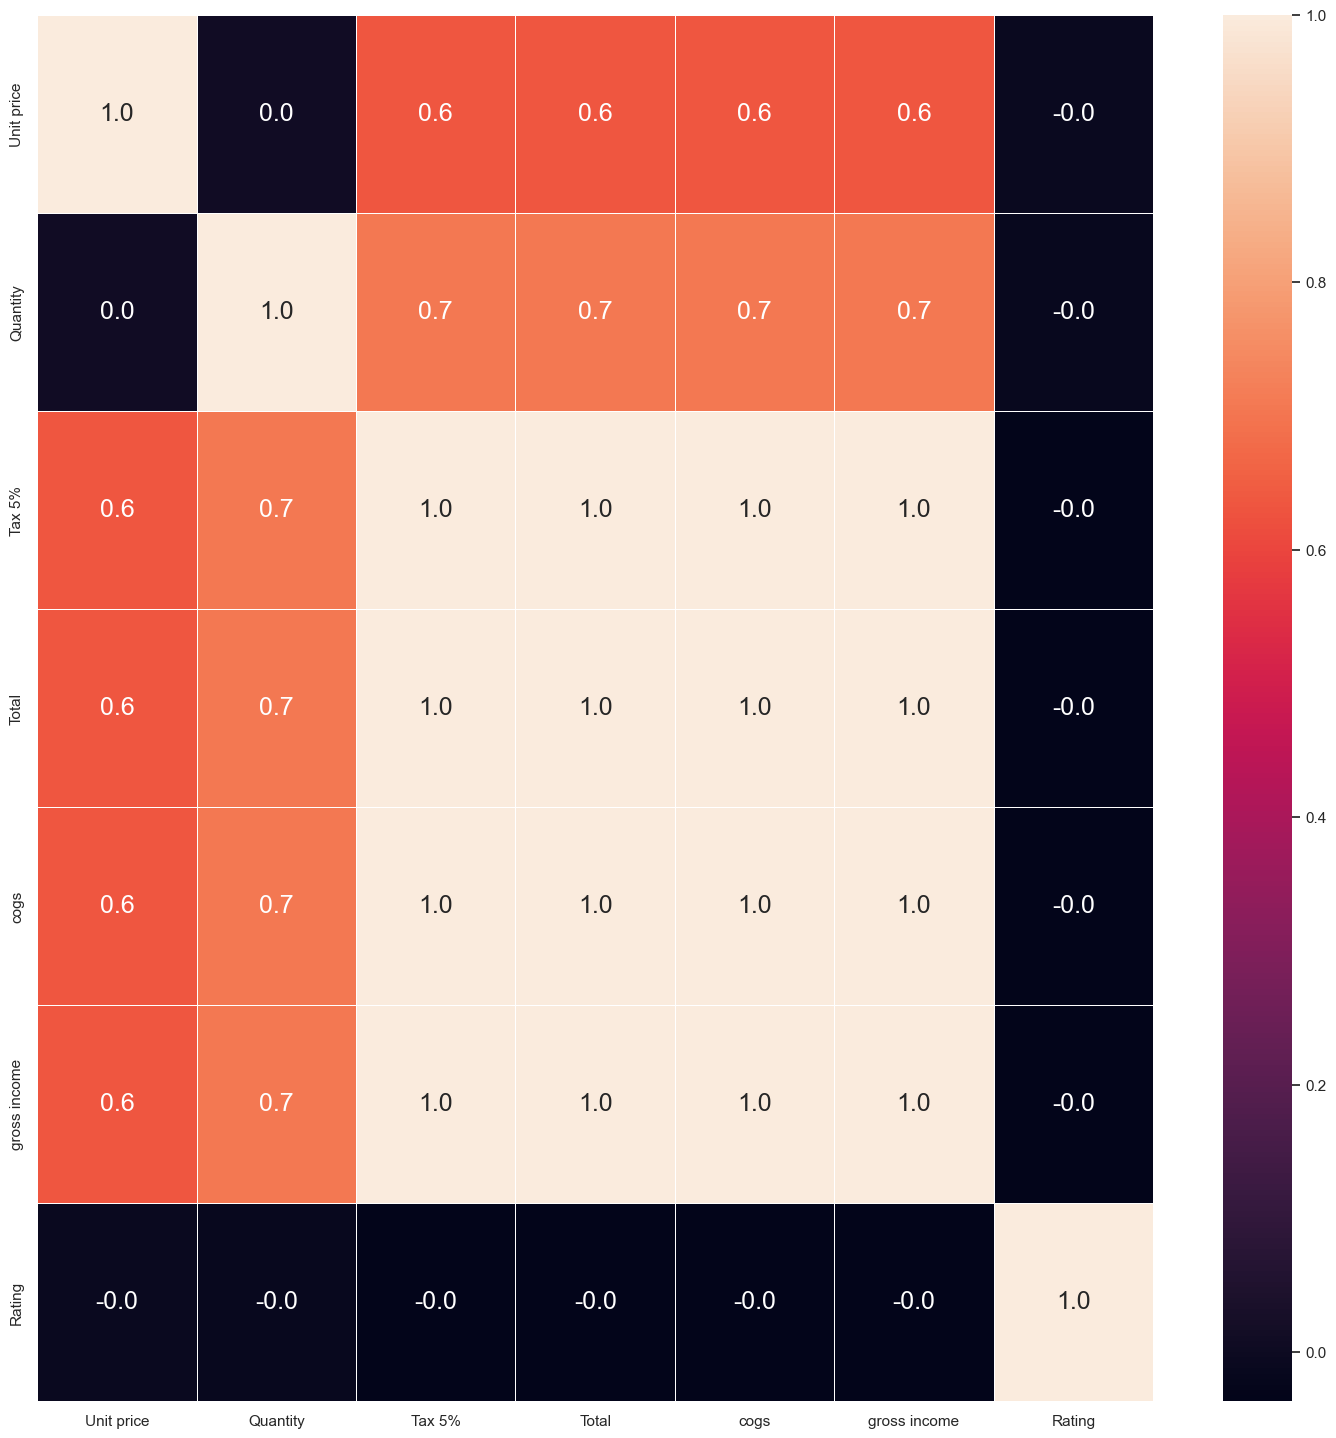

In [356]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.select_dtypes(exclude=['object','datetime64[ns]','int32']).corr(), annot=True, linewidths=0.5,fmt='.1f',ax=ax,annot_kws={"size": 18})
#Apply xticks

plt.show()

### Drop Columns Type of datetime64[ns]

In [358]:
df.drop(['Date','Time'],axis=1,inplace=True)

## Encoding

In [360]:
Encoder = OrdinalEncoder()
df = df.copy()
df[col_categorical] = Encoder.fit_transform(df[col_categorical])
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Day,Month,Year,Hour
0,0.0,2.0,0.0,0.0,3.0,74.69,7,26.1415,548.9715,2.0,522.83,26.1415,9.1,5,1,2019,13
1,2.0,1.0,1.0,0.0,0.0,15.28,5,3.8200,80.2200,0.0,76.40,3.8200,9.6,8,3,2019,10
2,0.0,2.0,1.0,1.0,4.0,46.33,7,16.2155,340.5255,1.0,324.31,16.2155,7.4,3,3,2019,13
3,0.0,2.0,0.0,1.0,3.0,58.22,8,23.2880,489.0480,2.0,465.76,23.2880,8.4,27,1,2019,20
4,0.0,2.0,1.0,1.0,5.0,86.31,7,30.2085,634.3785,2.0,604.17,30.2085,5.3,8,2,2019,10


In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         1000 non-null   float64
 1   City           1000 non-null   float64
 2   Customer type  1000 non-null   float64
 3   Gender         1000 non-null   float64
 4   Product line   1000 non-null   float64
 5   Unit price     1000 non-null   float64
 6   Quantity       1000 non-null   int64  
 7   Tax 5%         1000 non-null   float64
 8   Total          1000 non-null   float64
 9   Payment        1000 non-null   float64
 10  cogs           1000 non-null   float64
 11  gross income   1000 non-null   float64
 12  Rating         1000 non-null   float64
 13  Day            1000 non-null   int32  
 14  Month          1000 non-null   int32  
 15  Year           1000 non-null   int32  
 16  Hour           1000 non-null   int32  
dtypes: float64(12), int32(4), int64(1)
memory usage: 117.

## Split Dataset To Data And Label

In [364]:
X = df.drop('Unit price',axis=1)
y = df['Unit price']

## Split Dataset For Train And Test

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 44)

## View The Most Influential Feature using Lasso

In [368]:
lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000)

In [370]:
alpha = lasso_cv.alpha_
alpha

4.1458293831687865

In [372]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=4.1458293831687865)

In [374]:
names = df.columns.drop('Unit price')
names

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Quantity',
       'Tax 5%', 'Total', 'Payment', 'cogs', 'gross income', 'Rating', 'Day',
       'Month', 'Year', 'Hour'],
      dtype='object')

In [376]:
coeff = lasso.coef_
coeff

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -6.90568971,  0.        ,  0.12640171, -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ])

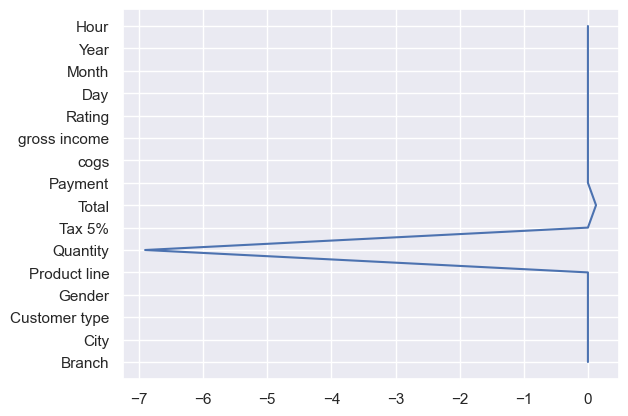

In [378]:
plt.plot(coeff,range(len(names)))
plt.yticks(range(len(names)),names)
plt.show()

In [380]:
lasso.score(X_train, y_train)


0.7768899913163412

In [382]:
lasso.score(X_test, y_test)


0.7719710488318021

## Train Model Using Linear Regression

In [384]:
LR = LinearRegression()

In [386]:
LR.fit(X_train,y_train)

LinearRegression()

In [388]:
LR.score(X_test,y_test)

0.777485304405641

## Model Evaluation

In [390]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [392]:
model_evaluation(LR,X_test, y_test,'LR')

,LR
MAE,8.943173
MSE,151.886004
RMSE,12.324204
R2-Score,0.777485
